In [1]:
import pandas as pd

Reading PM2.5 data

In [2]:
pm_df = pd.read_csv('/Users/nipun/Downloads/PM25-daily-2017.csv')

Finding unique locations for PM data

In [3]:
pm_df.location.unique()

array(['Income Tax Office', 'Siri Fort', 'Punjabi Bagh', 'Anand Vihar',
       'Mandir Marg', 'US Diplomatic Post: New Delhi', 'R K Puram',
       'Delhi Technological University', 'IHBAS', 'Shadipur',
       'NSIT Dwarka', 'IGI Airport Terminal-3, Delhi - IMD',
       'Burari Crossing, Delhi - IMD', 'Lodhi Road, Delhi - IMD',
       'North Campus, Delhi - IMD', 'CRRI Mathura Road, Delhi - IMD',
       'Pusa, Delhi - IMD', 'Aya Nagar, Delhi - IMD', 'Pusa2 IMD',
       'Punjabi Bagh, Delhi - DPCC',
       'Delhi Technological University, Delhi - CPCB',
       'Sirifort, Delhi - CPCB', 'Shadipur, Delhi - CPCB',
       'NSIT Dwarka, Delhi - CPCB', 'IHBAS, Delhi - CPCB',
       'Income Tax Office, Delhi - CPCB', 'Anand Vihar, Delhi - DPCC',
       'R K Puram, Delhi - DPCC', 'Mandir Marg, Delhi - DPCC'], dtype=object)

In [45]:
modis_df = pd.read_csv("modis-2017-3k.csv")

In [46]:
modis_df.Location.unique()

array(['Mandir', 'Pusa', 'Shadipur', 'Punjabi Bagh', 'IGI Airport',
       'NSIT Dwarka', 'Aya Nagar', 'CRRI Mathura', 'R K Puram', 'Sirifort',
       'US Diplomatic Post: New Delhi', 'ITO', 'Lodhi Road'], dtype=object)

In [54]:
modis_df.query('Year==2017 & Month==1 & Day==1 &Image_Optical_Depth_Land_And_Ocean>0').groupby("Location").mean()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Second,Latitude,Longitude,Optical_Depth_Land_And_Ocean,Image_Optical_Depth_Land_And_Ocean,Land_sea_Flag,Land_Ocean_Quality_Flag
Location,,,,,,,,,,,,,
Aya Nagar,229558,2017.0,1.0,1.0,7.0,3.0,55.0,28.480000,77.130000,0.335,0.335,1.0,3.0
CRRI Mathura,230911,2017.0,1.0,1.0,7.0,3.0,56.0,28.550000,77.280000,0.291,0.291,1.0,3.0
IGI Airport,230911,2017.0,1.0,1.0,7.0,3.0,56.0,28.560000,77.094000,0.291,0.291,1.0,3.0
Punjabi Bagh,232715,2017.0,1.0,1.0,7.0,3.0,58.0,28.668301,77.116699,0.250,0.250,1.0,3.0
Shadipur,232715,2017.0,1.0,1.0,7.0,3.0,58.0,28.651699,77.158096,0.250,0.250,1.0,3.0
Sirifort,230911,2017.0,1.0,1.0,7.0,3.0,56.0,28.549650,77.212150,0.291,0.291,1.0,3.0


In [55]:
mapping = {'Income Tax Office':'ITO',
           'Siri Fort':'Sirifort',
           'Punjabi Bagh':'Punjabi Bagh',
           'Mandir Marg':'Mandir',
           'US Diplomatic Post: New Delhi':'US Diplomatic Post: New Delhi',
           'R K Puram':'R K Puram',
           'Shadipur':'Shadipur',
           'NSIT Dwarka':'NSIT Dwarka',
           'IGI Airport Terminal-3, Delhi - IMD':'IGI Airport',
           'Lodhi Road, Delhi - IMD':'Lodhi Road',
           'CRRI Mathura Road, Delhi - IMD':'CRRI Mathura',
           'Pusa, Delhi - IMD':'Pusa',
           'Aya Nagar, Delhi - IMD':'Aya Nagar',
           'Pusa2 IMD':'Pusa',
           'Punjabi Bagh, Delhi - DPCC':'Punjabi Bagh',
           'Sirifort, Delhi - CPCB':'Sirifort',
           'Shadipur, Delhi - CPCB':'Shadipur',
           'NSIT Dwarka, Delhi - CPCB':'NSIT Dwarka',
           'Income Tax Office, Delhi - CPCB': 'ITO',
           'R K Puram, Delhi - DPCC':'R K Puram',
           'Mandir Marg, Delhi - DPCC':'Mandir'
           }

### Getting PM only for the points we care about

In [56]:
pm_df_subset = pm_df[pm_df.location.isin(mapping.keys())]

In [57]:
mapping_diff = {k:v for k,v in mapping.items() if k!=v}
mapping_diff

{'Aya Nagar, Delhi - IMD': 'Aya Nagar',
 'CRRI Mathura Road, Delhi - IMD': 'CRRI Mathura',
 'IGI Airport Terminal-3, Delhi - IMD': 'IGI Airport',
 'Income Tax Office': 'ITO',
 'Income Tax Office, Delhi - CPCB': 'ITO',
 'Lodhi Road, Delhi - IMD': 'Lodhi Road',
 'Mandir Marg': 'Mandir',
 'Mandir Marg, Delhi - DPCC': 'Mandir',
 'NSIT Dwarka, Delhi - CPCB': 'NSIT Dwarka',
 'Punjabi Bagh, Delhi - DPCC': 'Punjabi Bagh',
 'Pusa, Delhi - IMD': 'Pusa',
 'Pusa2 IMD': 'Pusa',
 'R K Puram, Delhi - DPCC': 'R K Puram',
 'Shadipur, Delhi - CPCB': 'Shadipur',
 'Siri Fort': 'Sirifort',
 'Sirifort, Delhi - CPCB': 'Sirifort'}

In [58]:
pm_df_subset = pm_df_subset.replace({'location':mapping_diff})

In [59]:
pm_df_subset.head()

,local,value,latitude,longitude,location
0,2017-01-01,556.073684,28.6235,77.2494,ITO
1,2017-01-02,264.157895,28.6235,77.2494,ITO
2,2017-01-03,189.456790,28.6235,77.2494,ITO
3,2017-01-04,152.208333,28.6235,77.2494,ITO
4,2017-01-05,201.447917,28.6235,77.2494,ITO


In [60]:
pm_df_subset.index = pd.to_datetime(pm_df_subset.local)

In [61]:
pm_df_subset.head()

,local,value,latitude,longitude,location
local,,,,,
2017-01-01,2017-01-01,556.073684,28.6235,77.2494,ITO
2017-01-02,2017-01-02,264.157895,28.6235,77.2494,ITO
2017-01-03,2017-01-03,189.456790,28.6235,77.2494,ITO
2017-01-04,2017-01-04,152.208333,28.6235,77.2494,ITO
2017-01-05,2017-01-05,201.447917,28.6235,77.2494,ITO


In [62]:
modis_df.index = pd.to_datetime(dict(year=modis_df.Year, month=modis_df.Month, day=modis_df.Day))

In [63]:
modis_df.sort_index(inplace=True)

In [70]:
modis_df = modis_df['2017']
modis_df = modis_df.query('Image_Optical_Depth_Land_And_Ocean>0')

In [107]:
loc_df = {}
for location in modis_df.Location.unique()[:]:
    print(location)
    loc_df[location] = modis_df[modis_df.Location==location].resample("1D").mean().dropna()
    loc_df[location]['Location'] = location

Shadipur
Punjabi Bagh
IGI Airport
Aya Nagar
CRRI Mathura
Sirifort
Lodhi Road
US Diplomatic Post: New Delhi
R K Puram
Pusa
NSIT Dwarka
Mandir
ITO


In [112]:
modis_df = pd.concat(loc_df)
modis_df.index = modis_df.index.droplevel()


In [113]:
t_drop = ["Unnamed: 0","Year","Month","Day","Hour","Minute","Second",
               "Latitude", "Longitude","Deep_Blue_Aerosol_Optical_Depth_550_Land",
               "AOD_550_Dark_Target_Deep_Blue_Combined_QA_Flag",
               "Optical_Depth_Land_And_Ocean", "Land_sea_Flag", "Land_Ocean_Quality_Flag"]
for col in t_drop:
    if col in modis_df.columns:
        modis_df = modis_df.drop(col, axis=1)
        


In [116]:
modis_df = modis_df.sort_index()
modis_df

,Image_Optical_Depth_Land_And_Ocean,Location
2017-01-01,0.3350,Aya Nagar
2017-01-01,0.2500,Shadipur
2017-01-01,0.2910,Sirifort
2017-01-01,0.2910,IGI Airport
2017-01-01,0.2910,CRRI Mathura
2017-01-01,0.2500,Punjabi Bagh
2017-01-02,0.4230,Lodhi Road
2017-01-02,0.4110,NSIT Dwarka
2017-01-02,0.3790,Sirifort
2017-01-02,0.3670,Aya Nagar


In [117]:
pm_df_subset = pm_df_subset.drop(["local","latitude","longitude"], axis=1)

In [118]:
pm_df_subset = pm_df_subset.rename(columns = {'location':'Location','value':'PM25'})

In [119]:
pm_df_subset.head()

,PM25,Location
local,,
2017-01-01,556.073684,ITO
2017-01-02,264.157895,ITO
2017-01-03,189.456790,ITO
2017-01-04,152.208333,ITO
2017-01-05,201.447917,ITO


In [121]:
pm_df_subset.head()

,PM25,Location
local,,
2017-01-01,556.073684,ITO
2017-01-02,264.157895,ITO
2017-01-03,189.456790,ITO
2017-01-04,152.208333,ITO
2017-01-05,201.447917,ITO


In [122]:
modis_df.index.name='Index'
pm_df_subset.index.name='Index'

In [123]:
pm_df_subset.describe()

,PM25
count,3128.000000
mean,116.231007
std,137.926843
min,-999.000000
25%,58.362071
50%,100.865625
75%,166.276256
max,1908.541667


In [124]:
pm_df_subset["Date"] = pm_df_subset.index.values
modis_df["Date"] = modis_df.index.values

In [125]:
pm_df_subset.head()

,PM25,Location,Date
Index,,,
2017-01-01,556.073684,ITO,2017-01-01
2017-01-02,264.157895,ITO,2017-01-02
2017-01-03,189.456790,ITO,2017-01-03
2017-01-04,152.208333,ITO,2017-01-04
2017-01-05,201.447917,ITO,2017-01-05


In [126]:
modis_df.head()

,Image_Optical_Depth_Land_And_Ocean,Location,Date
Index,,,
2017-01-01,0.335,Aya Nagar,2017-01-01
2017-01-01,0.250,Shadipur,2017-01-01
2017-01-01,0.291,Sirifort,2017-01-01
2017-01-01,0.291,IGI Airport,2017-01-01
2017-01-01,0.291,CRRI Mathura,2017-01-01


In [128]:
merged_df = pd.merge(modis_df, pm_df_subset, on =['Date', 'Location'])

In [129]:
merged_df = merged_df[merged_df.PM25>0.]


In [130]:
merged_df.describe()

,Image_Optical_Depth_Land_And_Ocean,PM25
count,952.000000,952.000000
mean,0.582325,104.210740
std,0.291121,66.668756
min,0.004000,0.840469
25%,0.366917,65.501014
50%,0.558000,91.583333
75%,0.735875,125.387939
max,1.975000,1153.250000


In [131]:
%matplotlib inline

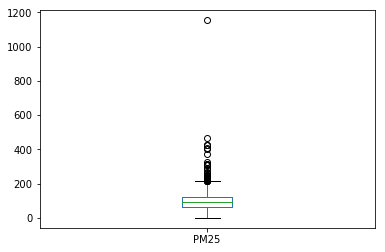

In [132]:
merged_df.PM25.plot(kind='box')

In [133]:
from scipy import stats
import numpy as np
after_od_merged_df = merged_df[(np.abs(stats.zscore(merged_df.PM25)) < 1.2)]

In [134]:
after_od_merged_df.describe()

,Image_Optical_Depth_Land_And_Ocean,PM25
count,872.000000,872.000000
mean,0.584333,92.794593
std,0.290751,36.584357
min,0.004000,25.475000
25%,0.369375,64.825291
50%,0.559250,88.113280
75%,0.739000,118.454688
max,1.975000,184.108108


In [136]:
after_od_merged_df.rename(columns={'Image_Optical_Depth_Land_And_Ocean':'AOD',
                                  'Aerosol_Cloud_Fraction_Land':'Cloud_Fraction'}, inplace=True)

/Users/nipun/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [137]:
after_od_merged_df.reindex()

,AOD,Location,Date,PM25
4,0.3670,Punjabi Bagh,2017-01-02,174.054054
6,0.3790,Mandir,2017-01-02,174.979167
7,0.6960,Mandir,2017-01-05,155.812500
10,0.3660,ITO,2017-01-06,152.968750
11,0.3660,Punjabi Bagh,2017-01-06,139.500000
12,0.3660,US Diplomatic Post: New Delhi,2017-01-06,145.833333
13,0.8210,R K Puram,2017-01-06,184.108108
14,0.3660,Mandir,2017-01-06,151.333333
15,0.8190,Sirifort,2017-01-06,159.984783
16,0.9050,US Diplomatic Post: New Delhi,2017-01-08,132.670833


In [138]:
after_od_merged_df.to_csv("pm25-modis-3k.csv")

In [139]:
modis_df['2017']

,Image_Optical_Depth_Land_And_Ocean,Location,Date
Index,,,
2017-01-01,0.3350,Aya Nagar,2017-01-01
2017-01-01,0.2500,Shadipur,2017-01-01
2017-01-01,0.2910,Sirifort,2017-01-01
2017-01-01,0.2910,IGI Airport,2017-01-01
2017-01-01,0.2910,CRRI Mathura,2017-01-01
2017-01-01,0.2500,Punjabi Bagh,2017-01-01
2017-01-02,0.4230,Lodhi Road,2017-01-02
2017-01-02,0.4110,NSIT Dwarka,2017-01-02
2017-01-02,0.3790,Sirifort,2017-01-02
